In [1]:
# Import the required libraries and dependencies
import pandas as pd
import hvplot.pandas
from pathlib import Path

In [2]:
# Using the read_csv function and Path module, create a DataFrame 
# by importing the sfo_neighborhoods_census_data.csv file from the Resources folder
sfo_data_df = pd.read_csv(
    Path('sfo_neighborhoods_census_data.csv'))

# Review the first and last five rows of the DataFrame
sfo_data_df.head()
sfo_data_df.tail()

,year,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
392,2016,Telegraph Hill,903.049771,384242,4390
393,2016,Twin Peaks,970.085470,384242,4390
394,2016,Van Ness/ Civic Center,552.602567,384242,4390
395,2016,Visitacion Valley,328.319007,384242,4390
396,2016,Westwood Park,631.195426,384242,4390


In [3]:
# Create a numerical aggregation that groups the data by the year and then averages the results.
housing_units_by_year = sfo_data_df.groupby('year')['housing_units'].mean()


# Review the DataFrame
housing_units_by_year

year
2010    372560.0
2011    374507.0
2012    376454.0
2013    378401.0
2014    380348.0
2015    382295.0
2016    384242.0
Name: housing_units, dtype: float64

In [4]:
# Create a visual aggregation explore the housing units by year
housing_units_by_year.hvplot.bar(
    title='Housing Units in San Francisco from 2010 to 2016',
    xlabel= 'Year',
    ylabel='Housing Units',
    rot=45).opts(
    yformatter='%.0f'
)

:Bars   [year]   (housing_units)

In [5]:
# Create a numerical aggregation by grouping the data by year and averaging the results
prices_square_foot_by_year = sfo_data_df.groupby('year').median()

# Review the resulting DataFrame
prices_square_foot_by_year

C:\Users\mfasi\AppData\Local\Temp\ipykernel_21412\1767525322.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  prices_square_foot_by_year = sfo_data_df.groupby('year').median()


,sale_price_sqr_foot,housing_units,gross_rent
year,,,
2010,347.394919,372560.0,1239.0
2011,337.914135,374507.0,1530.0
2012,381.835940,376454.0,2324.0
2013,456.969710,378401.0,2971.0
2014,526.677927,380348.0,3528.0
2015,576.457909,382295.0,3739.0
2016,661.064426,384242.0,4390.0


In [6]:
# Filter out the housing_units column, creating a new DataFrame 
# Keep only sale_price_sqr_foot and gross_rent averages per year
columns_to_drop = ['housing_units', 'neighborhood']
prices_square_foot_by_year = sfo_data_df.drop(columns_to_drop, axis=1)
prices_square_foot_by_year.groupby('year')['sale_price_sqr_foot'].mean()

avg_per_year_df = prices_square_foot_by_year.groupby('year')['sale_price_sqr_foot'].mean()

# Review the DataFrame
prices_square_foot_by_year

,year,sale_price_sqr_foot,gross_rent
0,2010,291.182945,1239
1,2010,267.932583,1239
2,2010,170.098665,1239
3,2010,347.394919,1239
4,2010,319.027623,1239
...,...,...,...
392,2016,903.049771,4390
393,2016,970.085470,4390
394,2016,552.602567,4390
395,2016,328.319007,4390


In [7]:
prices_square_foot_by_year.groupby('year')['gross_rent'].mean()
avg_gross_rent_df = prices_square_foot_by_year.groupby('year')['gross_rent'].mean()

In [8]:
# Plot prices_square_foot_by_year. 
# Inclued labels for the x- and y-axes, and a title.

concat_df = pd.concat([avg_gross_rent_df, avg_per_year_df], axis=1)
concat_df.hvplot(
    title='Prices per Square foot',
    xlabel='Year',
    ylabel='Sale Price per square foot',
    hover_line_color='yellow'
)

:NdOverlay   [Variable]
   :Curve   [year]   (value)

In [9]:
# Group by year and neighborhood and then create a new dataframe of the mean values
prices_by_year_by_neighborhood = sfo_data_df.groupby(['year', 'neighborhood']).mean()

# Review the DataFrame
prices_by_year_by_neighborhood

sale_price_sqr_foot  housing_units  gross_rent
year neighborhood                                                          
2010 Alamo Square                     291.182945       372560.0      1239.0
     Anza Vista                       267.932583       372560.0      1239.0
     Bayview                          170.098665       372560.0      1239.0
     Buena Vista Park                 347.394919       372560.0      1239.0
     Central Richmond                 319.027623       372560.0      1239.0
...                                          ...            ...         ...
2016 Telegraph Hill                   903.049771       384242.0      4390.0
     Twin Peaks                       970.085470       384242.0      4390.0
     Van Ness/ Civic Center           552.602567       384242.0      4390.0
     Visitacion Valley                328.319007       384242.0      4390.0
     Westwood Park                    631.195426       384242.0      4390.0

[397 rows x 3 columns]

In [10]:
# Filter out the housing_units
prices_by_year_by_neighborhood = prices_by_year_by_neighborhood[["sale_price_sqr_foot", "gross_rent"]]

# Review the first and last five rows of the DataFrame
display(prices_by_year_by_neighborhood.head())
display(prices_by_year_by_neighborhood.tail())

sale_price_sqr_foot  gross_rent
year neighborhood                                     
2010 Alamo Square               291.182945      1239.0
     Anza Vista                 267.932583      1239.0
     Bayview                    170.098665      1239.0
     Buena Vista Park           347.394919      1239.0
     Central Richmond           319.027623      1239.0

sale_price_sqr_foot  gross_rent
year neighborhood                                           
2016 Telegraph Hill                   903.049771      4390.0
     Twin Peaks                       970.085470      4390.0
     Van Ness/ Civic Center           552.602567      4390.0
     Visitacion Valley                328.319007      4390.0
     Westwood Park                    631.195426      4390.0

In [11]:
# Use hvplot to create an interactive line plot of the average price per square foot
# The plot should have a dropdown selector for the neighborhood

another_concat_df = pd.concat([prices_by_year_by_neighborhood], axis=1)

another_concat_df.hvplot.line(
    x="year",  
    groupby="neighborhood",  
    title='Sale Price Per Square Foot and Average Gross Rent - 2010-2016 - By Neighborhood',
    xlabel='Year',
    ylabel='Sale Price per square foot',
    hover_line_color='green'
)

:DynamicMap   [neighborhood]
   :NdOverlay   [Variable]
      :Curve   [year]   (value)

In [12]:
# Load neighborhoods coordinates data
neighborhood_locations_df = pd.read_csv('neighborhoods_coordinates.csv', index_col='Neighborhood')


# Review the DataFrame
neighborhood_locations_df

,Lat,Lon
Neighborhood,,
Alamo Square,37.791012,-122.402100
Anza Vista,37.779598,-122.443451
Bayview,37.734670,-122.401060
Bayview Heights,37.728740,-122.410980
Bernal Heights,37.728630,-122.443050
...,...,...
West Portal,37.740260,-122.463880
Western Addition,37.792980,-122.435790
Westwood Highlands,37.734700,-122.456854


In [13]:
# Calculate the mean values for each neighborhood
all_neighborhood_info_df = sfo_data_df.groupby('neighborhood').mean()


# Review the resulting DataFrame
all_neighborhood_info_df

,year,sale_price_sqr_foot,housing_units,gross_rent
neighborhood,,,,
Alamo Square,2013.000000,366.020712,378401.00,2817.285714
Anza Vista,2013.333333,373.382198,379050.00,3031.833333
Bayview,2012.000000,204.588623,376454.00,2318.400000
Bayview Heights,2015.000000,590.792839,382295.00,3739.000000
Bernal Heights,2013.500000,576.746488,379374.50,3080.333333
...,...,...,...,...
West Portal,2012.250000,498.488485,376940.75,2515.500000
Western Addition,2012.500000,307.562201,377427.50,2555.166667
Westwood Highlands,2012.000000,533.703935,376454.00,2250.500000


In [14]:
# Using the Pandas `concat` function, join the 
# neighborhood_locations_df and the all_neighborhood_info_df DataFrame
# The axis of the concatenation is "columns".
# The concat function will automatially combine columns with
# identical information, while keeping the additional columns.
all_neighborhoods_df = pd.concat(
    [neighborhood_locations_df, all_neighborhood_info_df], 
    axis="columns",
    sort=False
)

# Review the resulting DataFrame
display(all_neighborhoods_df.head())
display(all_neighborhoods_df.tail())


,Lat,Lon,year,sale_price_sqr_foot,housing_units,gross_rent
Alamo Square,37.791012,-122.402100,2013.000000,366.020712,378401.0,2817.285714
Anza Vista,37.779598,-122.443451,2013.333333,373.382198,379050.0,3031.833333
Bayview,37.734670,-122.401060,2012.000000,204.588623,376454.0,2318.400000
Bayview Heights,37.728740,-122.410980,2015.000000,590.792839,382295.0,3739.000000
Bernal Heights,37.728630,-122.443050,NaN,NaN,NaN,NaN


,Lat,Lon,year,sale_price_sqr_foot,housing_units,gross_rent
Yerba Buena,37.79298,-122.39636,2012.5,576.709848,377427.5,2555.166667
Bernal Heights,NaN,NaN,2013.5,576.746488,379374.5,3080.333333
Downtown,NaN,NaN,2013.0,391.434378,378401.0,2817.285714
Ingleside,NaN,NaN,2012.5,367.895144,377427.5,2509.000000
Outer Richmond,NaN,NaN,2013.0,473.900773,378401.0,2817.285714


In [15]:
# Call the dropna function to remove any neighborhoods that do not have data
all_neighborhoods_df = all_neighborhoods_df.reset_index().dropna()

# Rename the "index" column as "Neighborhood" for use in the Visualization
all_neighborhoods_df = all_neighborhoods_df.rename(columns={"index": "Neighborhood"})

# Review the resulting DataFrame
display(all_neighborhoods_df.head())
display(all_neighborhoods_df.tail())

,Neighborhood,Lat,Lon,year,sale_price_sqr_foot,housing_units,gross_rent
0,Alamo Square,37.791012,-122.402100,2013.000000,366.020712,378401.0,2817.285714
1,Anza Vista,37.779598,-122.443451,2013.333333,373.382198,379050.0,3031.833333
2,Bayview,37.734670,-122.401060,2012.000000,204.588623,376454.0,2318.400000
3,Bayview Heights,37.728740,-122.410980,2015.000000,590.792839,382295.0,3739.000000
5,Buena Vista Park,37.768160,-122.439330,2012.833333,452.680591,378076.5,2698.833333


,Neighborhood,Lat,Lon,year,sale_price_sqr_foot,housing_units,gross_rent
68,West Portal,37.74026,-122.463880,2012.25,498.488485,376940.75,2515.500000
69,Western Addition,37.79298,-122.435790,2012.50,307.562201,377427.50,2555.166667
70,Westwood Highlands,37.73470,-122.456854,2012.00,533.703935,376454.00,2250.500000
71,Westwood Park,37.73415,-122.457000,2015.00,687.087575,382295.00,3959.000000
72,Yerba Buena,37.79298,-122.396360,2012.50,576.709848,377427.50,2555.166667


In [16]:
# Create a plot to analyze neighborhood info
map_all_neighborhoods_df = all_neighborhoods_df.hvplot.points(
    'Lon',
    'Lat',
    tiles='OSM',
    geo=True, 
    size='sale_price_sqr_foot',
    color='gross_rent',
    alpha=0.8,
    frame_width = 700,
    frame_height = 500,
    title='OSM'
)
map_all_neighborhoods_df

C:\Users\mfasi\.conda\envs\dev\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Lon,Lat]   (gross_rent,sale_price_sqr_foot)

In [17]:
import pandas as pd
# Source: https://www.rentdata.org/san-francisco-ca-hud-metro-fmr-area/2017 

# Source data for average rent price in San Francisco over the past several years.
rent_data_4br = {
    'Year': [2017, 2018, 2019, 2020, 2021, 2022, 2023],  # Assuming you have data till November 2023
    'Average_Rent_Price': [5225, 4692, 4575, 4849, 5176, 4793, 4823]
}

# Create DataFrame
rent_df = pd.DataFrame(rent_data_4br)

# Display the DataFrame
rent_df


,Year,Average_Rent_Price
0,2017,5225
1,2018,4692
2,2019,4575
3,2020,4849
4,2021,5176
5,2022,4793
6,2023,4823


In [18]:
import pandas as pd
import hvplot.pandas 
import holoviews as hv

line_plot = rent_df.hvplot.line(x='Year', y='Average_Rent_Price', title='Average Rent Prices Over Years')

In [19]:
line_plot

:Curve   [Year]   (Average_Rent_Price)

In [21]:
import numpy as np

# Set the parameters for the Monte Carlo simulation
num_simulations = 1000  # Number of simulations
future_years = range(2023, 2028)  # Define the range of future years

# Get the mean and standard deviation of the available data
mean_percentage = rent_df['Average_Rent_Price'].mean()
std_dev_percentage = rent_df['Average_Rent_Price'].std()

# Create a DataFrame to store the simulated results
simulated_RENT = pd.DataFrame()

# Perform the Monte Carlo simulation
for i in range(num_simulations):
    # Simulate future work-from-home percentages based on a normal distribution
    simulated_percentages = np.random.normal(mean_percentage, std_dev_percentage, len(future_years))
    
    # Round the simulated percentages to two decimal places
    simulated_percentages = np.round(simulated_percentages, 2)
    
    # Store the simulated data in the DataFrame
    simulated_RENT[f"Simulation {i+1}"] = simulated_percentages

simulated_RENT.index = future_years  # Set the index to represent future years
simulated_RENT.head()  # Display the simulated work-from-home percentages

C:\Users\mfasi\AppData\Local\Temp\ipykernel_21412\3140182485.py:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  simulated_RENT[f"Simulation {i+1}"] = simulated_percentages
C:\Users\mfasi\AppData\Local\Temp\ipykernel_21412\3140182485.py:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  simulated_RENT[f"Simulation {i+1}"] = simulated_percentages
C:\Users\mfasi\AppData\Local\Temp\ipykernel_21412\3140182485.py:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, 

,Simulation 1,Simulation 2,Simulation 3,Simulation 4,Simulation 5,Simulation 6,Simulation 7,Simulation 8,Simulation 9,Simulation 10,...,Simulation 991,Simulation 992,Simulation 993,Simulation 994,Simulation 995,Simulation 996,Simulation 997,Simulation 998,Simulation 999,Simulation 1000
2023,5131.78,5312.58,4501.40,4821.95,4929.22,4866.74,5192.73,4909.68,5103.56,4723.50,...,5029.20,4720.29,4893.25,4676.79,4619.29,4843.10,4353.11,4844.04,4892.72,4991.88
2024,4250.18,4952.53,5020.02,4815.50,4557.90,5159.83,4959.02,4698.65,4630.69,4971.45,...,4758.15,5111.62,4984.32,5296.74,4961.98,5044.35,4786.32,5414.96,5309.45,5017.94
2025,4842.80,4737.07,5177.42,4663.39,4998.62,4816.98,4822.76,4959.32,5142.37,4872.12,...,5154.09,5090.43,4931.89,5163.57,4703.26,4845.56,4956.38,4745.03,5282.60,4636.12
2026,4936.32,4867.02,5168.02,4694.29,5001.29,4757.22,5017.00,4643.55,4962.27,4790.59,...,4811.96,4828.46,4898.49,4554.39,4601.99,5090.18,4669.27,4861.30,5190.97,4809.24
2027,4768.50,4513.24,4960.61,5137.08,5041.80,4616.97,4554.69,5020.20,5089.43,5137.80,...,4792.11,5042.91,4677.97,4786.83,4597.22,5073.98,4552.86,5033.83,4766.33,5107.19


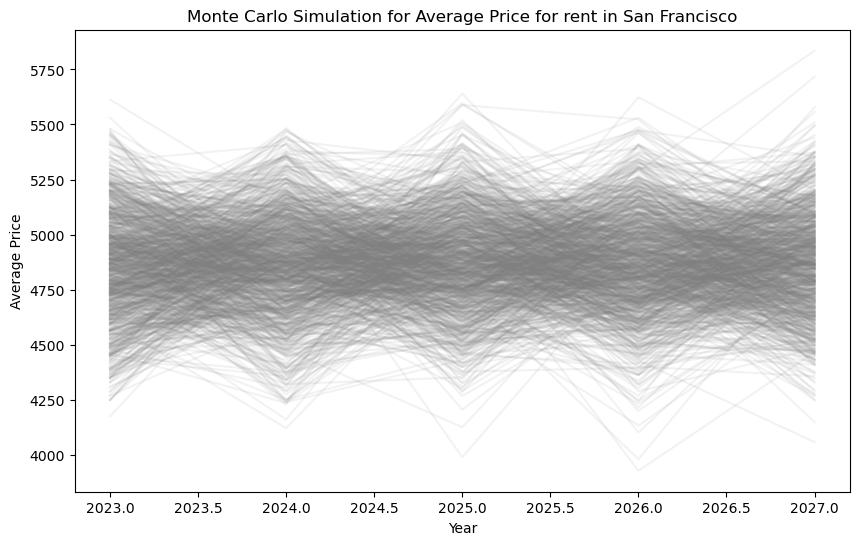

In [25]:
import matplotlib.pyplot as plt
# Plot the Monte Carlo simulation results
simulated_RENT.plot(legend=False, color='grey', alpha=0.1, figsize=(10, 6))
plt.title('Monte Carlo Simulation for Average Price for rent in San Francisco')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.show()

In [37]:
import pandas as pd

# Source: https://www.zillow.com/home-values/20330/san-francisco-ca/  

# Data for the average price of Homes in San Francisco S
median_home_price = {
    'Year': [2019, 2020, 2021, 2022, 2023],  # Assuming you have data till November 2023
    'Average Home Price': [1269849, 1335739, 1337260, 1473652, 1253859]
}

# Create DataFrame
median_home_price_df = pd.DataFrame(median_home_price)

median_home_price_df = median_home_price_df.set_index('Year')

# Display the DataFrame
median_home_price_df


,Average Home Price
Year,
2019,1269849
2020,1335739
2021,1337260
2022,1473652
2023,1253859


In [47]:
median_home_price_df_line = median_home_price_df.hvplot.line(
    title='Median Home Prices in San Francisco',
    xlabel='Year',
    ylabel= 'Home Price',
    hover_line_color='green',
)

median_home_price_df_line

:Curve   [Year]   (Average Home Price)

In [48]:
import numpy as np

# Set the parameters for the Monte Carlo simulation
num_simulations = 1000  # Number of simulations
future_years = range(2023, 2028)  # Define the range of future years

# Get the mean and standard deviation of the available data
mean_percentage = median_home_price_df['Average Home Price'].mean()
std_dev_percentage = median_home_price_df['Average Home Price'].std()

# Create a DataFrame to store the simulated results
simulated_home_price = pd.DataFrame()

# Perform the Monte Carlo simulation
for i in range(num_simulations):
    # Simulate future work-from-home percentages based on a normal distribution
    simulated_percentages = np.random.normal(mean_percentage, std_dev_percentage, len(future_years))
    
    # Round the simulated percentages to two decimal places
    simulated_percentages = np.round(simulated_percentages, 2)
    
    # Store the simulated data in the DataFrame
    simulated_home_price[f"Simulation {i+1}"] = simulated_percentages

simulated_home_price.index = future_years  # Set the index to represent future years
simulated_home_price.head()  # Display the simulated work-from-home percentages

C:\Users\mfasi\AppData\Local\Temp\ipykernel_21412\2578024983.py:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  simulated_home_price[f"Simulation {i+1}"] = simulated_percentages
C:\Users\mfasi\AppData\Local\Temp\ipykernel_21412\2578024983.py:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  simulated_home_price[f"Simulation {i+1}"] = simulated_percentages
C:\Users\mfasi\AppData\Local\Temp\ipykernel_21412\2578024983.py:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` 

,Simulation 1,Simulation 2,Simulation 3,Simulation 4,Simulation 5,Simulation 6,Simulation 7,Simulation 8,Simulation 9,Simulation 10,...,Simulation 991,Simulation 992,Simulation 993,Simulation 994,Simulation 995,Simulation 996,Simulation 997,Simulation 998,Simulation 999,Simulation 1000
2023,1249765.77,1436263.17,1300560.83,1356016.65,1256142.48,1216603.94,1297949.74,1375969.03,1357296.71,1287797.87,...,1287520.98,1372313.09,1283399.38,1321320.81,1517388.25,1394473.08,1369265.67,1331728.95,1354751.21,1482619.66
2024,1285091.07,1547438.41,1254486.16,1263207.11,1215341.43,1188774.97,1129422.97,1242826.78,1298850.01,1311091.04,...,1390641.60,1308229.79,1359268.32,1435567.15,1373091.37,1408655.93,1430372.91,1518473.89,1409385.94,1351002.25
2025,1271744.67,1320369.47,1411754.21,1288600.40,1301530.73,1481681.34,1300373.65,1237864.28,1226792.36,1289184.55,...,1243758.19,1401475.08,1334645.57,1339851.83,1399429.97,1360637.35,1368801.98,1143863.87,1301092.52,1316361.73
2026,1336295.40,1191173.39,1202655.02,1156836.39,1292296.76,1359829.79,1292382.01,1267936.66,1280693.64,1270671.85,...,1448011.51,1158256.92,1349638.96,1401535.23,1298726.21,1295869.97,1285620.43,1283297.59,1261462.64,1362583.20
2027,1230468.34,1358756.48,1339830.18,1416876.45,1440943.66,1387495.63,1386212.47,1337412.79,1417265.46,1286829.29,...,1223269.00,1445473.22,1386545.45,1309989.88,1241579.86,1310369.20,1511700.80,1280444.56,1145977.64,1260341.18


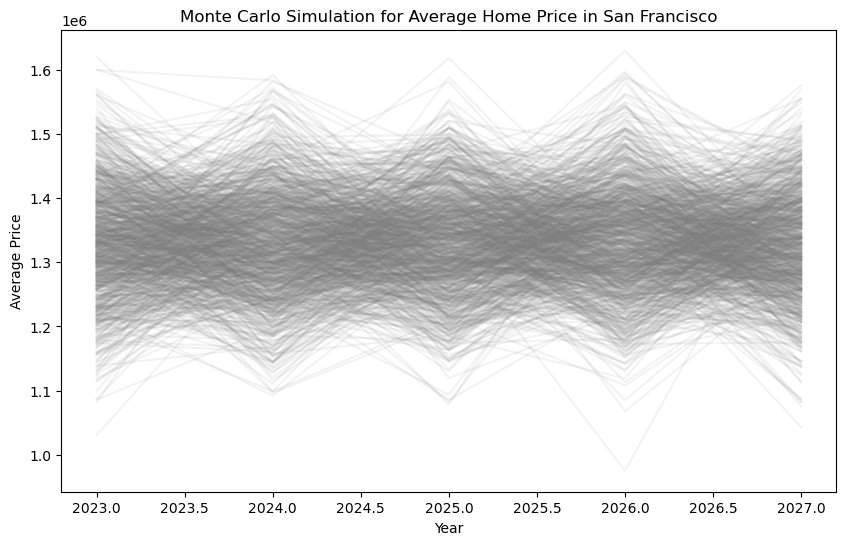

In [49]:
import matplotlib.pyplot as plt
# Plot the Monte Carlo simulation results
simulated_home_price.plot(legend=False, color='grey', alpha=0.1, figsize=(10, 6))
plt.title('Monte Carlo Simulation for Average Home Price in San Francisco')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.show()

In [ ]:
# Sources-
# rent data i found: https://www.rentdata.org/san-francisco-ca-hud-metro-fmr-area/2017
# Zillow home price data: https://www.zillow.com/home-values/20330/san-francisco-ca/ 